Lectura de la variable **Activos**, análisis y preprocesado

In [1]:
import pandas as pd
##from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.impute import KNNImputer
#from tabulate import tabulate


In [2]:
ruta="../../data/"
ficheroLectura=ruta+"activos.csv"
ficheroEscritura=ruta+"activosProcesado.csv"
patronColumnas="AC"

In [3]:
#Lectura del csv donde se encuentran los datos de la variable por años
#Se comprueba que no hay valores de ID de empresa duplicados


dfOriginal = pd.read_csv(ficheroLectura, decimal=',', dtype=float)
df = dfOriginal.filter(like=patronColumnas)
duplicados = dfOriginal['ID'].duplicated().any()
print(f"La columna ID tiene valores duplicados: {duplicados}")
print(f"Número de filas: {len(df)}")
print(df.head())


La columna ID tiene valores duplicados: False
Número de filas: 12266
       AC2010      AC2011      AC2012      AC2013      AC2014      AC2015  \
0  11697859.0  12868552.0  14811037.0  18641219.0  11022554.0   9215317.0   
1   5402736.0   5912765.0   6516455.0   6708356.0   6892495.0   7660340.0   
2  11398083.0  11879015.0  11190514.0   7403224.0   7526550.0   5943790.0   
3  62186256.0  67786948.0  73910912.0  73356720.0  75906512.0  64388452.0   
4  57413260.0  62116784.0  63368211.0  59451682.0  62103937.0  65480176.0   

       AC2016      AC2017      AC2018      AC2019      AC2020       AC2021  \
0  12441370.0  12319179.0  12286936.0  15117256.0  10955802.0   18847081.0   
1   8107256.0   8045288.0   7849988.0   7973634.0   8619100.0   10235858.0   
2  16839876.0  12290646.0  11856776.0  12114680.0  12161855.0   12375093.0   
3  68453502.0  72384365.0  68557474.0  79607704.0  81612123.0  105166396.0   
4  51625800.0  50136454.0  50578231.0  56752621.0  54283615.0   64174281.0   


In [4]:
df.head(10)#muestro  las 10 primeras filas

,AC2010,AC2011,AC2012,AC2013,AC2014,AC2015,AC2016,AC2017,AC2018,AC2019,AC2020,AC2021,AC2022
0,11697859.0,12868552.0,14811037.0,18641219.0,11022554.0,9215317.0,12441370.0,12319179.0,12286936.0,15117256.0,10955802.0,18847081.0,14996374.0
1,5402736.0,5912765.0,6516455.0,6708356.0,6892495.0,7660340.0,8107256.0,8045288.0,7849988.0,7973634.0,8619100.0,10235858.0,12188346.0
2,11398083.0,11879015.0,11190514.0,7403224.0,7526550.0,5943790.0,16839876.0,12290646.0,11856776.0,12114680.0,12161855.0,12375093.0,12428740.0
3,62186256.0,67786948.0,73910912.0,73356720.0,75906512.0,64388452.0,68453502.0,72384365.0,68557474.0,79607704.0,81612123.0,105166396.0,99060656.0
4,57413260.0,62116784.0,63368211.0,59451682.0,62103937.0,65480176.0,51625800.0,50136454.0,50578231.0,56752621.0,54283615.0,64174281.0,65552379.0
5,6723200.0,7235510.0,7184363.0,7420686.0,7379364.0,7354979.0,11785142.0,11413860.0,10320410.0,15899406.0,16033812.0,16018729.0,16244969.0
6,6317644.0,10827269.0,10331403.0,9929851.0,9662317.0,9579899.0,7595058.0,7731558.0,8007807.0,7809895.0,8853224.0,8415624.0,8535578.0
7,183401004.0,238995114.0,183803816.0,220847242.0,200353601.0,200130804.0,146011782.0,170797248.0,160732730.0,181080716.0,221431372.0,273876286.0,310414166.0
8,2296782.0,2314526.0,1632381.0,1448936.0,1501898.0,8209359.0,8454270.0,9051122.0,7599675.0,3668926.0,3785593.0,3669935.0,3631309.0
9,27969071.0,33300017.0,31752158.0,35144584.0,43543477.0,47784697.0,42758588.0,44758062.0,44365390.0,53007212.0,48018818.0,54072139.0,52237326.0


In [5]:
# Contar valores nulos por columna
# Consideramos tanto los NaN como los 0 como valores faltantes para este cálculo

df.replace(0, np.nan, inplace=True)
porcentajeFaltantes = (df.isnull()).mean() * 100
print( "Porcentaje de datos faltantes por año:")
print(porcentajeFaltantes)





Porcentaje de datos faltantes por año:
AC2010    25.900864
AC2011    21.881624
AC2012    19.117887
AC2013    13.712702
AC2014     9.766835
AC2015     7.590086
AC2016     3.807272
AC2017     0.000000
AC2018     0.000000
AC2019     0.000000
AC2020     6.701451
AC2021     4.190445
AC2022     7.288440
dtype: float64


<ipython-input-5-f2345fe28886>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(0, np.nan, inplace=True)


**Cálculo de outliers**

In [6]:
# Calcula el IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
limiteInferior = Q1 - 10 * IQR
limiteSuperior = Q3 + 10 * IQR

# Imprime los umbrales
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Umbrales para {col}: Límite Inferior = {limiteInferior[col]}, Límite Superior = {limiteSuperior[col]}")

# Considerar como outlier aquellos valores que están fuera del rango de Q1 - 10*IQR y Q3 + 10*IQR
print("Numero de outliers por año")
outliers = ((df < (limiteInferior)) | (df > (limiteSuperior))).sum()


# Mostrar los outliers
print(outliers)

Umbrales para AC2010: Límite Inferior = -129398860.0, Límite Superior = 148918340.0
Umbrales para AC2011: Límite Inferior = -147210095.547, Límite Superior = 169504990.76999998
Umbrales para AC2012: Límite Inferior = -164330642.0, Límite Superior = 189474670.0
Umbrales para AC2013: Límite Inferior = -173123427.25, Límite Superior = 200420456.75
Umbrales para AC2014: Límite Inferior = -192436234.0, Límite Superior = 223330712.0
Umbrales para AC2015: Límite Inferior = -215753385.14, Límite Superior = 250749141.15399998
Umbrales para AC2016: Límite Inferior = -239305126.0, Límite Superior = 278613810.5
Umbrales para AC2017: Límite Inferior = -249225241.593, Límite Superior = 290742659.88
Umbrales para AC2018: Límite Inferior = -274937279.5, Límite Superior = 319624396.25
Umbrales para AC2019: Límite Inferior = -300336986.98999995, Límite Superior = 348218125.26399994
Umbrales para AC2020: Límite Inferior = -312825228.2975, Límite Superior = 362508765.40225
Umbrales para AC2021: Límite Inf

In [7]:
# Agrupar las filas por porcentaje de  valores  nan
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()

# Mostrar el resultado
print(nanRow)

0     7518
1     1429
2      834
3      723
4      572
5      472
6      384
7      217
8       81
9       31
10       5
dtype: int64


In [8]:
# Eliminar los valores  considerados outliers

df = df.where((df >= limiteInferior) & (df <= limiteSuperior), np.nan)


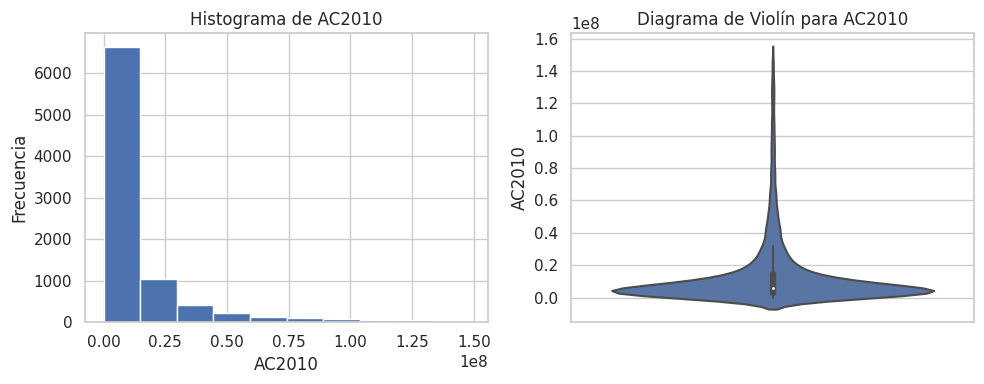

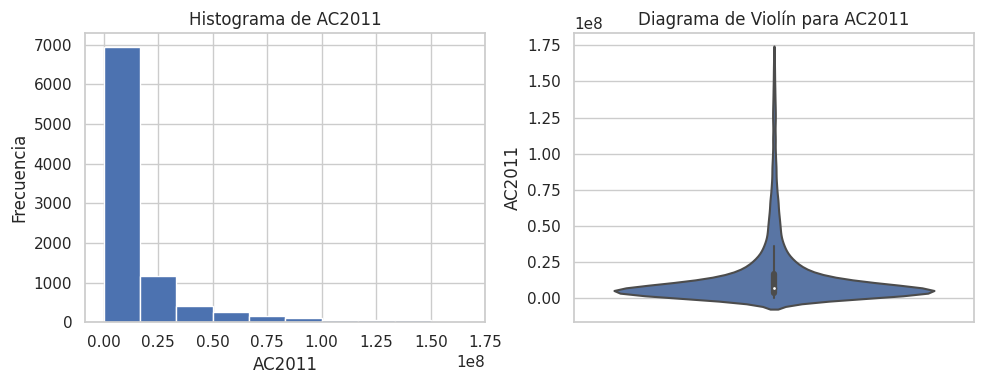

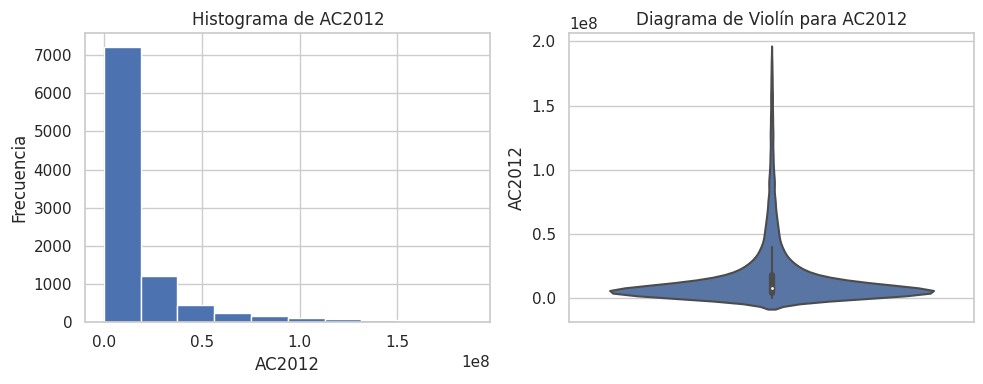

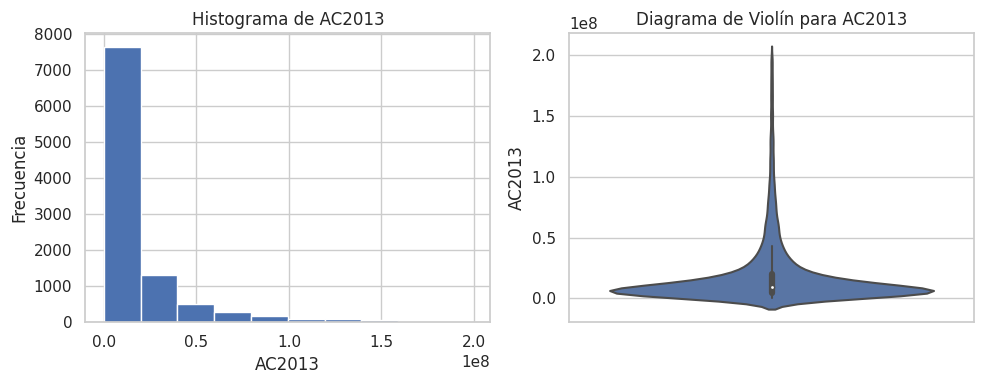

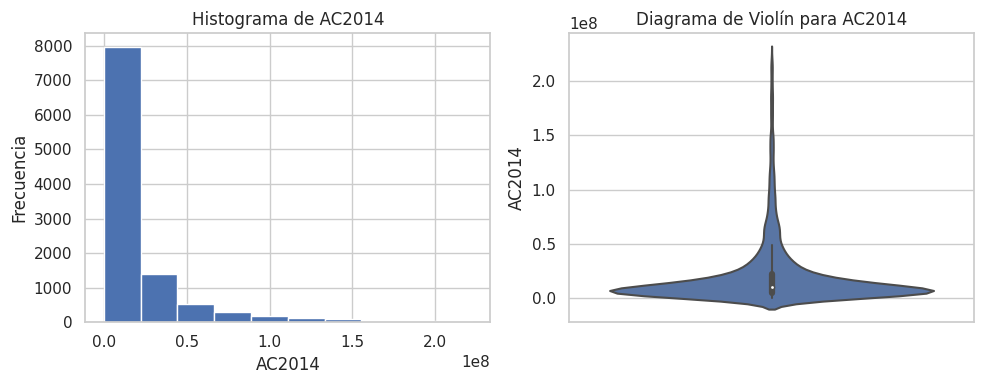

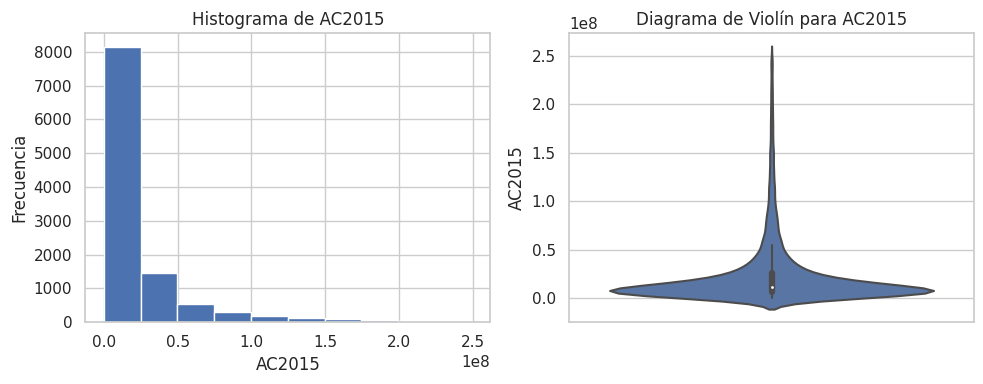

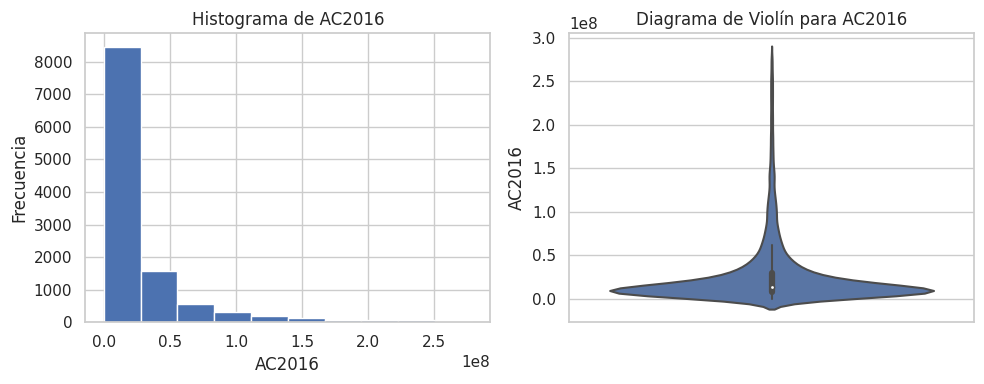

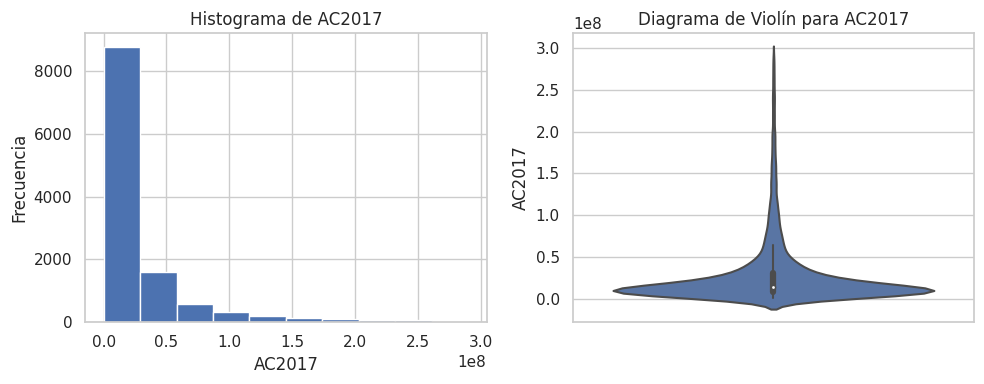

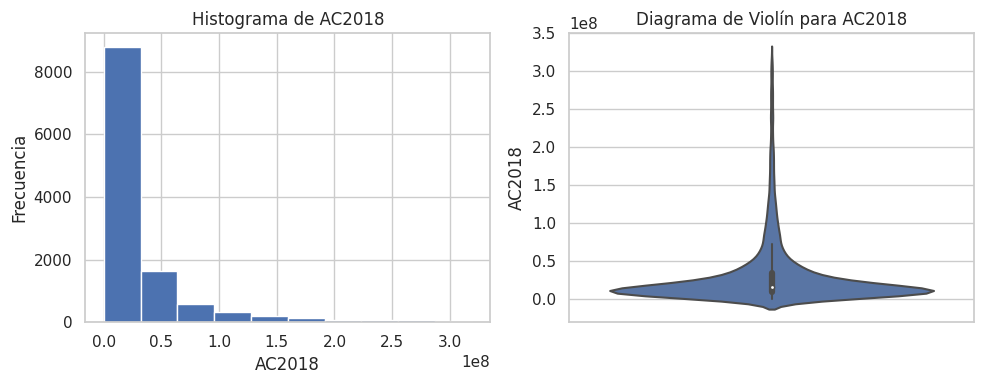

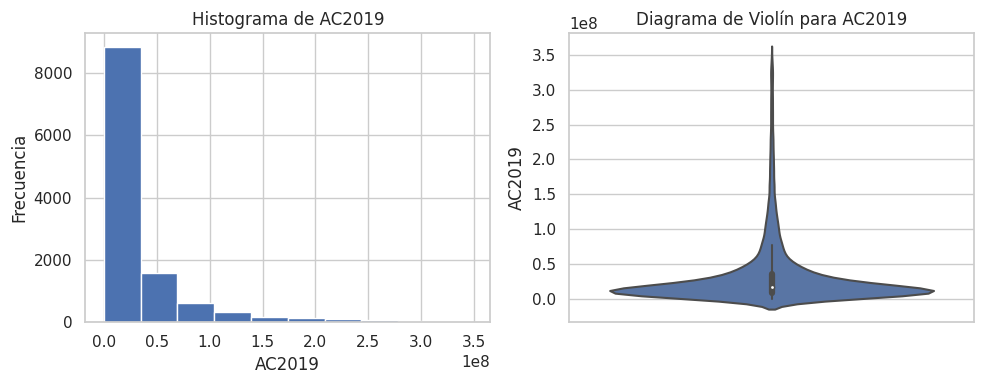

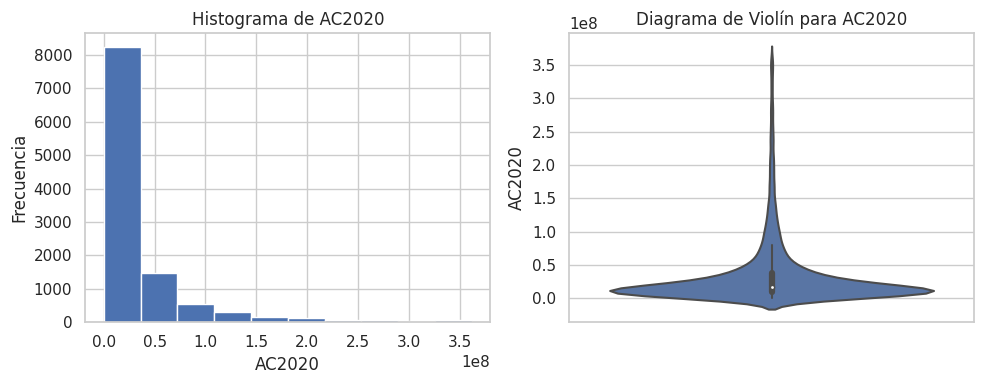

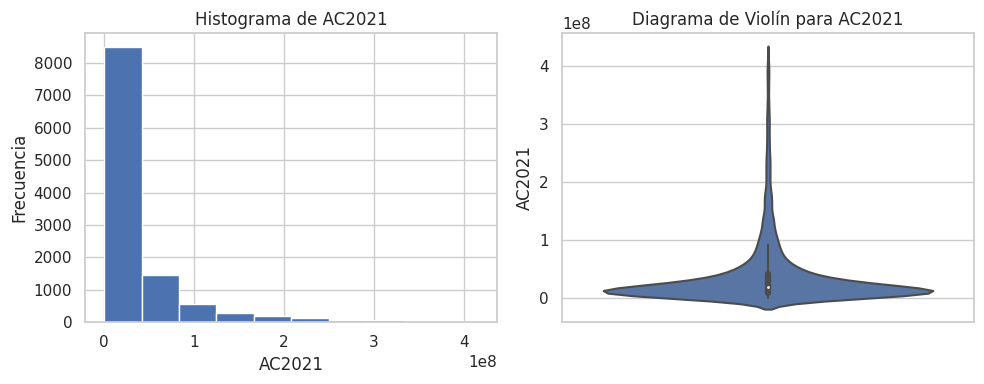

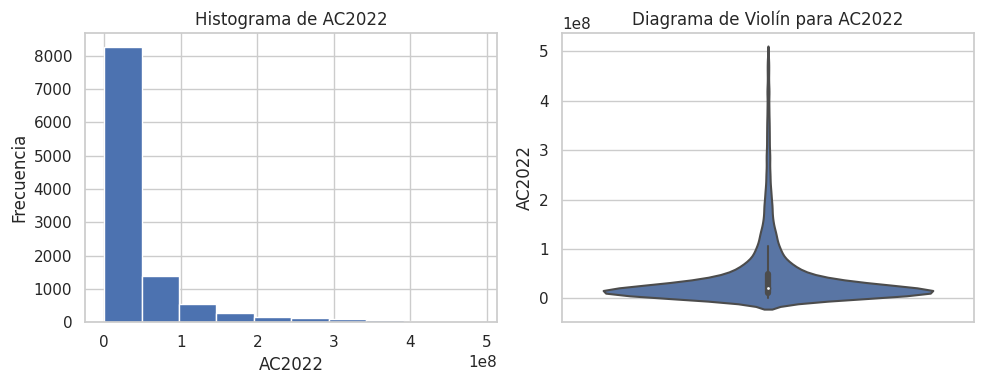

In [9]:
sns.set(style="whitegrid")

# Generar histogramas y diagramas de violín para cada columna
for columna in df.select_dtypes(include=['float64', 'int64']).columns:
    # Histograma
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    df[columna].hist()
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Diagrama de violín
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.violinplot(data=df, y=columna)
    plt.title(f'Diagrama de Violín para {columna}')

    plt.tight_layout()
    plt.show()

In [10]:
# Agrupar las filas por numero de nan despues de haber marcado los outliers
nanRow = df.apply(lambda row: pd.isna(row).sum(), axis=1).value_counts().sort_index()

# Mostrar el resultado
print("Agrupación de las filas según el número de nan que tengan (de 0 a 13)")
print(nanRow)




Agrupación de las filas según el número de nan que tengan (de 0 a 13)
0     7091
1     1419
2      846
3      730
4      599
5      485
6      408
7      231
8      103
9       63
10      33
11      26
12      30
13     202
dtype: int64


**Imputación de valores nulos**


Se usará una interpolación por filas. Después de esta operación quedarán aún valores nan  en el caso de que no existan valores no nulos en los extremos de cada fila. Esos valores se imputarán  con la media de la fila. Para las filas que tengan todos su valores nulos, se les imputará lotro valor en el notebook de integración de datos.

In [11]:
df.head(20)

,AC2010,AC2011,AC2012,AC2013,AC2014,AC2015,AC2016,AC2017,AC2018,AC2019,AC2020,AC2021,AC2022
0,1.169786e+07,12868552.0,14811037.0,18641219.0,11022554.0,9215317.0,12441370.0,12319179.0,12286936.0,15117256.0,10955802.0,1.884708e+07,14996374.0
1,5.402736e+06,5912765.0,6516455.0,6708356.0,6892495.0,7660340.0,8107256.0,8045288.0,7849988.0,7973634.0,8619100.0,1.023586e+07,12188346.0
2,1.139808e+07,11879015.0,11190514.0,7403224.0,7526550.0,5943790.0,16839876.0,12290646.0,11856776.0,12114680.0,12161855.0,1.237509e+07,12428740.0
3,6.218626e+07,67786948.0,73910912.0,73356720.0,75906512.0,64388452.0,68453502.0,72384365.0,68557474.0,79607704.0,81612123.0,1.051664e+08,99060656.0
4,5.741326e+07,62116784.0,63368211.0,59451682.0,62103937.0,65480176.0,51625800.0,50136454.0,50578231.0,56752621.0,54283615.0,6.417428e+07,65552379.0
5,6.723200e+06,7235510.0,7184363.0,7420686.0,7379364.0,7354979.0,11785142.0,11413860.0,10320410.0,15899406.0,16033812.0,1.601873e+07,16244969.0
6,6.317644e+06,10827269.0,10331403.0,9929851.0,9662317.0,9579899.0,7595058.0,7731558.0,8007807.0,7809895.0,8853224.0,8.415624e+06,8535578.0
7,NaN,NaN,183803816.0,NaN,200353601.0,200130804.0,146011782.0,170797248.0,160732730.0,181080716.0,221431372.0,2.738763e+08,310414166.0
8,2.296782e+06,2314526.0,1632381.0,1448936.0,1501898.0,8209359.0,8454270.0,9051122.0,7599675.0,3668926.0,3785593.0,3.669935e+06,3631309.0
9,2.796907e+07,33300017.0,31752158.0,35144584.0,43543477.0,47784697.0,42758588.0,44758062.0,44365390.0,53007212.0,48018818.0,5.407214e+07,52237326.0


In [12]:
df = df.interpolate(method='linear', axis=1, inplace=False)
df.head(20)

,AC2010,AC2011,AC2012,AC2013,AC2014,AC2015,AC2016,AC2017,AC2018,AC2019,AC2020,AC2021,AC2022
0,1.169786e+07,12868552.0,14811037.0,18641219.0,11022554.0,9215317.0,12441370.0,12319179.0,12286936.0,15117256.0,1.095580e+07,1.884708e+07,14996374.0
1,5.402736e+06,5912765.0,6516455.0,6708356.0,6892495.0,7660340.0,8107256.0,8045288.0,7849988.0,7973634.0,8.619100e+06,1.023586e+07,12188346.0
2,1.139808e+07,11879015.0,11190514.0,7403224.0,7526550.0,5943790.0,16839876.0,12290646.0,11856776.0,12114680.0,1.216186e+07,1.237509e+07,12428740.0
3,6.218626e+07,67786948.0,73910912.0,73356720.0,75906512.0,64388452.0,68453502.0,72384365.0,68557474.0,79607704.0,8.161212e+07,1.051664e+08,99060656.0
4,5.741326e+07,62116784.0,63368211.0,59451682.0,62103937.0,65480176.0,51625800.0,50136454.0,50578231.0,56752621.0,5.428362e+07,6.417428e+07,65552379.0
5,6.723200e+06,7235510.0,7184363.0,7420686.0,7379364.0,7354979.0,11785142.0,11413860.0,10320410.0,15899406.0,1.603381e+07,1.601873e+07,16244969.0
6,6.317644e+06,10827269.0,10331403.0,9929851.0,9662317.0,9579899.0,7595058.0,7731558.0,8007807.0,7809895.0,8.853224e+06,8.415624e+06,8535578.0
7,NaN,NaN,183803816.0,192078708.5,200353601.0,200130804.0,146011782.0,170797248.0,160732730.0,181080716.0,2.214314e+08,2.738763e+08,310414166.0
8,2.296782e+06,2314526.0,1632381.0,1448936.0,1501898.0,8209359.0,8454270.0,9051122.0,7599675.0,3668926.0,3.785593e+06,3.669935e+06,3631309.0
9,2.796907e+07,33300017.0,31752158.0,35144584.0,43543477.0,47784697.0,42758588.0,44758062.0,44365390.0,53007212.0,4.801882e+07,5.407214e+07,52237326.0


In [13]:
# Después de intentar la interpolación se imputa la media  de los valores de una fila  a los na consecutivos que resten
df = df.apply(lambda row: row.fillna(row.mean()), axis=1)
df.head(20)

,AC2010,AC2011,AC2012,AC2013,AC2014,AC2015,AC2016,AC2017,AC2018,AC2019,AC2020,AC2021,AC2022
0,1.169786e+07,1.286855e+07,14811037.0,18641219.0,11022554.0,9215317.0,12441370.0,12319179.0,12286936.0,15117256.0,1.095580e+07,1.884708e+07,14996374.0
1,5.402736e+06,5.912765e+06,6516455.0,6708356.0,6892495.0,7660340.0,8107256.0,8045288.0,7849988.0,7973634.0,8.619100e+06,1.023586e+07,12188346.0
2,1.139808e+07,1.187902e+07,11190514.0,7403224.0,7526550.0,5943790.0,16839876.0,12290646.0,11856776.0,12114680.0,1.216186e+07,1.237509e+07,12428740.0
3,6.218626e+07,6.778695e+07,73910912.0,73356720.0,75906512.0,64388452.0,68453502.0,72384365.0,68557474.0,79607704.0,8.161212e+07,1.051664e+08,99060656.0
4,5.741326e+07,6.211678e+07,63368211.0,59451682.0,62103937.0,65480176.0,51625800.0,50136454.0,50578231.0,56752621.0,5.428362e+07,6.417428e+07,65552379.0
5,6.723200e+06,7.235510e+06,7184363.0,7420686.0,7379364.0,7354979.0,11785142.0,11413860.0,10320410.0,15899406.0,1.603381e+07,1.601873e+07,16244969.0
6,6.317644e+06,1.082727e+07,10331403.0,9929851.0,9662317.0,9579899.0,7595058.0,7731558.0,8007807.0,7809895.0,8.853224e+06,8.415624e+06,8535578.0
7,2.037010e+08,2.037010e+08,183803816.0,192078708.5,200353601.0,200130804.0,146011782.0,170797248.0,160732730.0,181080716.0,2.214314e+08,2.738763e+08,310414166.0
8,2.296782e+06,2.314526e+06,1632381.0,1448936.0,1501898.0,8209359.0,8454270.0,9051122.0,7599675.0,3668926.0,3.785593e+06,3.669935e+06,3631309.0
9,2.796907e+07,3.330002e+07,31752158.0,35144584.0,43543477.0,47784697.0,42758588.0,44758062.0,44365390.0,53007212.0,4.801882e+07,5.407214e+07,52237326.0


In [14]:
#se añada al dataset procesado la columna con el ID de la empresa, que se había prescindido de ella en la lectura del csv original
df.insert(0, "ID", dfOriginal["ID"].copy().astype(int))
df.head(20)

,ID,AC2010,AC2011,AC2012,AC2013,AC2014,AC2015,AC2016,AC2017,AC2018,AC2019,AC2020,AC2021,AC2022
0,233151,1.169786e+07,1.286855e+07,14811037.0,18641219.0,11022554.0,9215317.0,12441370.0,12319179.0,12286936.0,15117256.0,1.095580e+07,1.884708e+07,14996374.0
1,233207,5.402736e+06,5.912765e+06,6516455.0,6708356.0,6892495.0,7660340.0,8107256.0,8045288.0,7849988.0,7973634.0,8.619100e+06,1.023586e+07,12188346.0
2,233235,1.139808e+07,1.187902e+07,11190514.0,7403224.0,7526550.0,5943790.0,16839876.0,12290646.0,11856776.0,12114680.0,1.216186e+07,1.237509e+07,12428740.0
3,233284,6.218626e+07,6.778695e+07,73910912.0,73356720.0,75906512.0,64388452.0,68453502.0,72384365.0,68557474.0,79607704.0,8.161212e+07,1.051664e+08,99060656.0
4,233291,5.741326e+07,6.211678e+07,63368211.0,59451682.0,62103937.0,65480176.0,51625800.0,50136454.0,50578231.0,56752621.0,5.428362e+07,6.417428e+07,65552379.0
5,233382,6.723200e+06,7.235510e+06,7184363.0,7420686.0,7379364.0,7354979.0,11785142.0,11413860.0,10320410.0,15899406.0,1.603381e+07,1.601873e+07,16244969.0
6,233417,6.317644e+06,1.082727e+07,10331403.0,9929851.0,9662317.0,9579899.0,7595058.0,7731558.0,8007807.0,7809895.0,8.853224e+06,8.415624e+06,8535578.0
7,233487,2.037010e+08,2.037010e+08,183803816.0,192078708.5,200353601.0,200130804.0,146011782.0,170797248.0,160732730.0,181080716.0,2.214314e+08,2.738763e+08,310414166.0
8,233529,2.296782e+06,2.314526e+06,1632381.0,1448936.0,1501898.0,8209359.0,8454270.0,9051122.0,7599675.0,3668926.0,3.785593e+06,3.669935e+06,3631309.0
9,233550,2.796907e+07,3.330002e+07,31752158.0,35144584.0,43543477.0,47784697.0,42758588.0,44758062.0,44365390.0,53007212.0,4.801882e+07,5.407214e+07,52237326.0


In [15]:
df.tail(20)

,ID,AC2010,AC2011,AC2012,AC2013,AC2014,AC2015,AC2016,AC2017,AC2018,AC2019,AC2020,AC2021,AC2022
12246,21184749937,1.315938e+08,1.315938e+08,1.315938e+08,1.315938e+08,1.315938e+08,1.315938e+08,1.315938e+08,1.388968e+08,1.318650e+08,1.297003e+08,1.297003e+08,129700278.0,1.297003e+08
12247,21186870341,2.581905e+08,2.581905e+08,2.581905e+08,2.581905e+08,2.581905e+08,2.581905e+08,2.581905e+08,1.121053e+08,1.471788e+08,3.224648e+08,3.224648e+08,322464786.0,3.224648e+08
12248,21187657067,6.114247e+07,6.114247e+07,6.114247e+07,6.114247e+07,6.114247e+07,6.114247e+07,6.114247e+07,4.662683e+07,5.662596e+07,5.649148e+07,5.376260e+07,69642528.0,8.370538e+07
12249,21187870136,8.366047e+07,8.366047e+07,8.366047e+07,8.366047e+07,8.366047e+07,8.366047e+07,8.366047e+07,7.013531e+07,9.288456e+07,9.925383e+07,8.572832e+07,72202800.0,8.175801e+07
12250,21188490777,8.645812e+06,8.645812e+06,8.645812e+06,8.645812e+06,8.645812e+06,6.958348e+06,8.542239e+06,8.639444e+06,8.752349e+06,8.874850e+06,8.984538e+06,9124420.0,9.290306e+06
12251,21188640418,1.073886e+05,1.073886e+05,1.073886e+05,1.073886e+05,1.073886e+05,1.073886e+05,1.073886e+05,9.914000e+04,1.140420e+05,1.082630e+05,1.511439e+05,81310.0,9.043300e+04
12252,21189171804,1.868105e+08,1.868105e+08,1.868105e+08,1.868105e+08,1.868105e+08,1.868105e+08,1.868105e+08,1.966528e+08,2.101812e+08,1.636769e+08,1.682928e+08,172908720.0,2.091507e+08
12253,21189435432,3.593170e+05,3.593170e+05,3.593170e+05,3.593170e+05,3.593170e+05,3.593170e+05,3.593170e+05,5.000000e+04,9.263600e+04,2.394170e+05,6.204500e+05,591283.0,5.621160e+05
12254,21203587455,4.202852e+07,4.202852e+07,4.202852e+07,4.202852e+07,4.202852e+07,4.202852e+07,2.739167e+07,3.543359e+07,3.896459e+07,4.198983e+07,4.955738e+07,50675037.0,5.018752e+07
12255,21203985473,7.660795e+06,7.660795e+06,7.660795e+06,7.660795e+06,7.660795e+06,7.660795e+06,7.660795e+06,6.040336e+06,1.455902e+07,8.050698e+06,5.283777e+06,5042976.0,6.987960e+06


In [16]:
df.to_csv(ficheroEscritura, index=False) #seguarda en un nuevo csv